## 1. Import Library serta Melakukan Eksplor Dataset Dengan Pandas

In [33]:
# Import library yang akan digunakan dalam melakukan prediksi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [34]:
# Read dataset
data_februari = pd.read_csv("volume-pengangkutan-sampah-di-kali-sungai-situ-waduk-bulan-februari-tahun-2021.csv", 
                            encoding="latin-1")
data_februari.tail()

,bulan,titik_lokasi,kecamatan,wilayah,panjang/luas,satuan_panjang/luas,tanggal,volume_sampah_perhari(m3)
49247,2,Kali Cakung Drain (Jembatan Tinggi-Perbatasan ...,Cakung,Jakarta Timur,800,m,28,-
49248,2,PHB Rawa Teratai,Cakung,Jakarta Timur,700,m,28,-
49249,2,PHB Rawa Gelam III,Cakung,Jakarta Timur,1000,m,28,-
49250,2,PHB Metropos KIP,Cakung,Jakarta Timur,1000,m,28,-
49251,2,PHB Warung Jengkol,Cakung,Jakarta Timur,400,m,28,-


In [35]:
# Melihat info dataset (tipe data, total record data, dll)
data_februari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49252 entries, 0 to 49251
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   bulan                      49252 non-null  int64 
 1    titik_lokasi              49252 non-null  object
 2    kecamatan                 49252 non-null  object
 3    wilayah                   49252 non-null  object
 4    panjang/luas              39816 non-null  object
 5   satuan_panjang/luas        29428 non-null  object
 6   tanggal                    49252 non-null  int64 
 7   volume_sampah_perhari(m3)  49252 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.0+ MB


In [36]:
# Menghapus jarak spasi pada kolom dataset
data_februari.columns = data_februari.columns.str.replace(" ", "")

In [37]:
# Melihat nilai statistik deskriptif dari dataframe untuk keseluruhan kolom
data_februari.describe(include="all")

,bulan,titik_lokasi,kecamatan,wilayah,panjang/luas,satuan_panjang/luas,tanggal,volume_sampah_perhari(m3)
count,49252.0,49252,49252,49252,39816,29428,49252.000000,49252
unique,NaN,1753,42,5,299,9,NaN,93
top,NaN,PHB Pramuka,Tanjung Priok,Jakarta Barat,1000,m,NaN,0
freq,NaN,56,2632,14840,5936,26964,NaN,14029
mean,2.0,NaN,NaN,NaN,NaN,NaN,14.500000,NaN
std,0.0,NaN,NaN,NaN,NaN,NaN,8.077829,NaN
min,2.0,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,2.0,NaN,NaN,NaN,NaN,NaN,7.750000,NaN
50%,2.0,NaN,NaN,NaN,NaN,NaN,14.500000,NaN
75%,2.0,NaN,NaN,NaN,NaN,NaN,21.250000,NaN


Hasil keluaran diatas menandakan beberapa nilai-nilai dari statistik deskriptif dari kedua jenis data yakni numerik (tipe data int & float) dan kategorik (tipe data object/string) dan tentu saja setiap jenis data memiliki nilai deskriptif yang berbeda. Seperti misalnya jenis data numerik memiliki nilai deskriptif seperti count, mean, std (standard deviasi), maximum, minimum, quartil 1 (25%), quartil 2/median (50%) dan quartil 3 (75%). Sedangkan jenis data kategorik memiliki nilai deskriptif seperti count, unique, top dan freq (frekuensi data).

Sebagai contoh dapat dilihat pada penjelasan dibawah ini:

- Pada kolom titik_lokasi tidak memiliki nilai mean, standard deviasi, min, dll, tetapi memiliki nilai top, unique, freq, dll. Hal tersebut dikarenakan kolom titik_lokasi bersifat kategorik (karena memiliki tipe data string). Maka dari itu kolom titik_lokasi memiliki nilai top yakni PHB Pramuka, nilai freq adalah 56, dst.

- Sedangkan pada kolom tanggal tidak memiliki nilai top, freq, dll tetapi memiliki nilai mean, standard deviasi, min, max, dll. Hal tersebut dikarenakan kolom tanggal bersifat numerik. Hal ini dapat dilihat dari nilai mean pada kolom tanggal adalah 14.5, nilai max adalah 28.0, nilai quartil 3 adalah 21.25, dst.

Berikut adalah kolom-kolom yang bersifat kategorik dan numerik:

- Kategorik: titik_lokasi, kecamatan, wilayah, panjang/luas, satuan_panjang/luas dan volume_sampah_perhari(m3).
- Numerik: bulan dan tanggal.

In [38]:
# Melihat tipe data dari masing-masing kolom yang ada di dalam dataframe
data_februari.dtypes

bulan                         int64
titik_lokasi                 object
kecamatan                    object
wilayah                      object
panjang/luas                 object
satuan_panjang/luas          object
tanggal                       int64
volume_sampah_perhari(m3)    object
dtype: object

In [39]:
# Melihat nama kolom yang ada di dalam dataframe
data_februari.columns

Index(['bulan', 'titik_lokasi', 'kecamatan', 'wilayah', 'panjang/luas',
       'satuan_panjang/luas', 'tanggal', 'volume_sampah_perhari(m3)'],
      dtype='object')

In [40]:
# Melihat jumlah rows dan kolom pada dataframe
data_februari.shape

(49252, 8)

Sangat berbeda sekali jumlah rows atau jumlah baris dari dataframe bulan Februari dengan bulan Januari. Pada bulan Januari jumlah rows-nya sebanyak 54343 sedangkan jumlah rows di bulan Februari yakni mencapai 49252.

In [41]:
"""
Menghitung nilai dari beberapa kolom (kecamatan, wilayah, satuan_panjang/satuan) 
dari yang sering muncul - tidak sering muncul di dalam dataframe
"""
print(data_februari["kecamatan"].value_counts())
print()

print(data_februari["wilayah"].value_counts())
print()

print(data_februari["satuan_panjang/luas"].value_counts())

Tanjung Priok        2632
Kalideres            2632
Penjaringan          2492
Cilincing            2296
Cengkareng           2240
Grogol Petamburan    2100
Cakung               2044
Kembangan            2016
Tamansari            1764
Pademangan           1708
Kebon Jeruk          1428
Tambora              1400
Kelapa Gading        1344
Palmerah             1260
Koja                 1260
Jatinegara           1232
Pulo Gadung          1176
Duren Sawit          1176
Jagakarsa            1092
Pasar Rebo           1036
Kramat Jati          1008
Matraman              868
Makasar               868
Gambir                840
Ciracas               840
Tanah Abang           812
Pancoran              784
Cilandak              756
Kebayoran Baru        756
Pasar Minggu          756
Kebayoran Lama        728
Setiabudi             700
Tebet                 672
Mampang Prapatan      644
Cipayung              588
Pesanggrahan          560
Sawah Besar           504
Kemayoran             476
Senen       

In [42]:
"""
Mengubah nama kolom satuan_panjang/luas menjadi satuan_panjang untuk melihat data yang disesuaikan. Seperti misalkan ingin
melihat data kecamatan yang hanya berisi informasi kecamatan Tanjung Priok, dst
"""
rename_column_data = data_februari.rename(columns={"satuan_panjang/luas": "satuan_panjang", 
                                                   "volume_sampah_perhari(m3)": "volume_sampah_perhari", 
                                                   "panjang/luas": "panjang_luas"})

rename_column_data.columns

Index(['bulan', 'titik_lokasi', 'kecamatan', 'wilayah', 'panjang_luas',
       'satuan_panjang', 'tanggal', 'volume_sampah_perhari'],
      dtype='object')

In [43]:
# Memisahkan semua data yang memiliki kecamatan = Tanjung Priok
data_tanjung_priok = rename_column_data[rename_column_data.kecamatan == "Tanjung Priok"]
data_tanjung_priok.head(10)

,bulan,titik_lokasi,kecamatan,wilayah,panjang_luas,satuan_panjang,tanggal,volume_sampah_perhari
332,2,PHB Sunter Ready Mix Ruas bypass Yos Sudarso,Tanjung Priok,Jakarta Utara,NaN,NaN,1,2
333,2,Kali Lagoa Tirem depan Sukmul,Tanjung Priok,Jakarta Utara,NaN,NaN,1,3
334,2,Kali Lagoa Tirem Depan Saringan,Tanjung Priok,Jakarta Utara,NaN,NaN,1,0
335,2,Kali Lagoa Buntu Enim,Tanjung Priok,Jakarta Utara,NaN,NaN,1,3
336,2,Kali Lagoa Buntu Arhanud,Tanjung Priok,Jakarta Utara,NaN,NaN,1,2
337,2,Kali Lagoa Kanal Jembatan Arhanud,Tanjung Priok,Jakarta Utara,NaN,NaN,1,2
338,2,Kali Lagoa Kanal Enggano,Tanjung Priok,Jakarta Utara,NaN,NaN,1,3
339,2,Kali Lagoa Buntu Jembatan Bugis,Tanjung Priok,Jakarta Utara,NaN,NaN,1,3
340,2,Kali Sentiong Jembatan Jubile School,Tanjung Priok,Jakarta Utara,NaN,NaN,1,1
341,2,Kali Sentiong Blok A,Tanjung Priok,Jakarta Utara,NaN,NaN,1,1


In [44]:
# Memisahkan semua data yang memiliki wilayah = Jakarta Pusat
data_jakpus = rename_column_data[rename_column_data.wilayah == "Jakarta Pusat"]
data_jakpus.head()

,bulan,titik_lokasi,kecamatan,wilayah,panjang_luas,satuan_panjang,tanggal,volume_sampah_perhari
0,2,Kali / Sungai Sentiong - Ruas Dewi Sri,Johar Baru,Jakarta Pusat,464,m,1,2
1,2,Kali / Sungai Sentiong - Ruas Abapon,Johar Baru,Jakarta Pusat,464,m,1,3
2,2,Kali / Sungai Sentiong - JL Tanah Tinggi,Johar Baru,Jakarta Pusat,464,m,1,3
3,2,Kali / Sungai Sentiong Jl.Galur - Pombensin,Johar Baru,Jakarta Pusat,606,m,1,4
4,2,Kali / Sungai Sentiong - Jl. Timah,Johar Baru,Jakarta Pusat,310,m,1,7


In [45]:
# Memisahkan semua data yang memiliki satuan_panjang = m (meter)
data_m = rename_column_data[rename_column_data.satuan_panjang == "m"]
data_m.head(10)

,bulan,titik_lokasi,kecamatan,wilayah,panjang_luas,satuan_panjang,tanggal,volume_sampah_perhari
0,2,Kali / Sungai Sentiong - Ruas Dewi Sri,Johar Baru,Jakarta Pusat,464,m,1,2
1,2,Kali / Sungai Sentiong - Ruas Abapon,Johar Baru,Jakarta Pusat,464,m,1,3
2,2,Kali / Sungai Sentiong - JL Tanah Tinggi,Johar Baru,Jakarta Pusat,464,m,1,3
3,2,Kali / Sungai Sentiong Jl.Galur - Pombensin,Johar Baru,Jakarta Pusat,606,m,1,4
4,2,Kali / Sungai Sentiong - Jl. Timah,Johar Baru,Jakarta Pusat,310,m,1,7
5,2,PHB Kawi Kawi Bawah,Johar Baru,Jakarta Pusat,620,m,1,0.5
6,2,PHB Kayu Awet,Johar Baru,Jakarta Pusat,300,m,1,12
7,2,PHB Pulo Gundul,Johar Baru,Jakarta Pusat,500,m,1,1
8,2,PHB Tanah Tinggi XII,Johar Baru,Jakarta Pusat,500,m,1,1
9,2,PHB Bala Dewa,Johar Baru,Jakarta Pusat,330,m,1,1


In [46]:
# Memisahkan semua data yang memiliki volume_sampah_perhari(m3) = - 
data_strip = rename_column_data[rename_column_data.volume_sampah_perhari == "-"]
data_strip.head(10)

,bulan,titik_lokasi,kecamatan,wilayah,panjang_luas,satuan_panjang,tanggal,volume_sampah_perhari
55,2,PHB Abdul Muis,Gambir,Jakarta Pusat,1000,m,1,-
56,2,PHB Petojo,Gambir,Jakarta Pusat,500,m,1,-
57,2,PHB Budi Kemulian,Gambir,Jakarta Pusat,500,m,1,-
578,2,Kali Cengkareng Drain (Depan Pasar Kemiri Jl. ...,Kembangan,Jakarta Barat,1500,m,1,-
581,2,Kali PHB RW. 04 (Stasiun Pompa),Kembangan,Jakarta Barat,1000,m,1,-
590,2,Kali Pesanggrahan (Jln. H. Nabet - Metro TV),Kembangan,Jakarta Barat,1500,m,1,-
599,2,Danau Hutan Kota Srengseng,Kembangan,Jakarta Barat,1.5,HA,1,-
600,2,PHB Jambu Rt 07 Rw 07 Srengseng,Kembangan,Jakarta Barat,500,m,1,-
602,2,PHB Komplek BPPT Srengseng,Kembangan,Jakarta Barat,600,m,1,-
603,2,PHB Pesanggrahan Jl. Meruya ilir,Kembangan,Jakarta Barat,600,m,1,-


In [47]:
data_panjangluas = rename_column_data[rename_column_data.panjang_luas == "3500/70"]
data_panjangluas.head()

,bulan,titik_lokasi,kecamatan,wilayah,panjang_luas,satuan_panjang,tanggal,volume_sampah_perhari
157,2,Kali BKT Marunda Pintu Air Sekatan 1,Cilincing,Jakarta Utara,3500/70,NaN,1,0
1916,2,Kali BKT Marunda Pintu Air Sekatan 1,Cilincing,Jakarta Utara,3500/70,NaN,2,0
3675,2,Kali BKT Marunda Pintu Air Sekatan 1,Cilincing,Jakarta Utara,3500/70,NaN,3,12
5434,2,Kali BKT Marunda Pintu Air Sekatan 1,Cilincing,Jakarta Utara,3500/70,NaN,4,0
7193,2,Kali BKT Marunda Pintu Air Sekatan 1,Cilincing,Jakarta Utara,3500/70,NaN,5,52


## 2. Data Preprocessing

In [48]:
# Mengecek apakah di dalam dataframe terdapat nilai duplikat/tidak
data_februari.duplicated().sum()

0

In [49]:
# Mengubah format penamaan kolom dari yang semula huruf kecil menjadi huruf gabungan (huruf besar & kecil)
data_februari = data_februari.rename(str.title, axis="columns")
data_februari.columns

Index(['Bulan', 'Titik_Lokasi', 'Kecamatan', 'Wilayah', 'Panjang/Luas',
       'Satuan_Panjang/Luas', 'Tanggal', 'Volume_Sampah_Perhari(M3)'],
      dtype='object')

In [50]:
# Mengecek nilai kosong (NaN) dari masing-masing kolom di dataframe
data_februari.isnull().sum()

Bulan                            0
Titik_Lokasi                     0
Kecamatan                        0
Wilayah                          0
Panjang/Luas                  9436
Satuan_Panjang/Luas          19824
Tanggal                          0
Volume_Sampah_Perhari(M3)        0
dtype: int64

Jika dilihat dari hasil diatas maka hanya terdapat 2 kolom yang memiliki nilai NaN (Not a Number) atau nilai kosong yaitu kolom "Panjang/Luas" dan "Satuan_Panjang/Luas". Namun jika diperhatikan kembali terdapat 3 kolom yang memiliki nilai NaN yakni kolom "Panjang/Luas", "Satuan_Panjang/Luas", dan kolom "Volume_Sampah_Perhari(M3)".

Mengapa terdapat kolom "Volume_Sampah_Perhari(M3)"?

Hal tersebut dikarenakan nilai kosong yang ada di kolom "Volume_Sampah_Perhari(M3)" ditulis dengan simbol "-". Karena kolom ini merupakan kolom prediksi maka dari itu saya akan mengubahnya menjadi nilai mean atau nilai rata-rata. Tetapi sebelum itu nilai "-" ini akan saya ubah terlebih dahulu menjadi nilai NaN (Not a Number).

In [51]:
# Menghapus karakter yang berada di kolom "Panjang/Luas" seperti pada data 3500/70 yang dapat dilihat pada tahapan sebelumnya
data_februari["Panjang/Luas"] = data_februari["Panjang/Luas"].str.replace(r"\D", "")

In [52]:
# Mengahapus karakter "-" di kolom "Volume_Sampah_Perhari(M3)" dengan nilai NaN
data_februari["Volume_Sampah_Perhari(M3)"] = data_februari["Volume_Sampah_Perhari(M3)"].replace("-", np.nan)

data_februari.tail()

,Bulan,Titik_Lokasi,Kecamatan,Wilayah,Panjang/Luas,Satuan_Panjang/Luas,Tanggal,Volume_Sampah_Perhari(M3)
49247,2,Kali Cakung Drain (Jembatan Tinggi-Perbatasan ...,Cakung,Jakarta Timur,800,m,28,NaN
49248,2,PHB Rawa Teratai,Cakung,Jakarta Timur,700,m,28,NaN
49249,2,PHB Rawa Gelam III,Cakung,Jakarta Timur,1000,m,28,NaN
49250,2,PHB Metropos KIP,Cakung,Jakarta Timur,1000,m,28,NaN
49251,2,PHB Warung Jengkol,Cakung,Jakarta Timur,400,m,28,NaN


In [53]:
# Mengubah tipe data di kolom "Panjang/Luas" dari string menjadi float
data_februari[["Panjang/Luas"]] = data_februari[["Panjang/Luas"]].apply(pd.to_numeric)

In [54]:
# Mengubah tipe data pada kolom "Volume_Sampah_Perhari(M3)" dari string menjadi float
data_februari["Volume_Sampah_Perhari(M3)"] = pd.to_numeric(data_februari["Volume_Sampah_Perhari(M3)"], errors="coerce")

data_februari.dtypes

Bulan                          int64
Titik_Lokasi                  object
Kecamatan                     object
Wilayah                       object
Panjang/Luas                 float64
Satuan_Panjang/Luas           object
Tanggal                        int64
Volume_Sampah_Perhari(M3)    float64
dtype: object

Selain kolom "Panjang/Luas" dan kolom "Volume_Sampah_Perhari(M3)", saya juga akan mengubah format tipe data dari kolom "Satuan_Panjang/Luas". Walaupun tidak termasuk ke dalam kolom untuk memprediksi volume sampah yang berhasil diangkut di setiap harinya, tetapi kolom "Panjang/Luas" dan "Satuan_Panjang/Luas" akan saya buat visualisasinya. Maka dari itu kedua kolom ini tidak boleh memiliki nilai kosong (NaN) karena ditakutkan akan terjadi kesalahpahaman pembaca dalam menafsirkan kesimpulan dari grafik yang saya buat.

In [55]:
# Melihat nilai total dari masing-masing data yang ada di kolom "Satuan_Panjang/Luas"
data_februari["Satuan_Panjang/Luas"].value_counts()

m     26964
M      1428
Ha      784
H        84
HA       56
m2       28
m²       28
km       28
M³       28
Name: Satuan_Panjang/Luas, dtype: int64

Berdasarkan hasil diatas dapat dilihat bahwa nilai data hektar (yang dilambangkan dengan Ha) memiliki banyak sekali penulisan yang berbeda-beda seperti H dan HA padahal semuanya memiliki satu kesatuan yaitu Ha. Maka dari itu saya akan menjadikan nilai data H, dan HA ini menjadi satu kesatuan saja yakni data Ha.

Selain itu nilai dari data seperti M akan saya jadikan sebagai nilai m saja dan nilai m2 juga akan saya gabungkan dengan nilai m².

In [56]:
# Mengganti nilai data yang mirip seperti Ha, m, dan m²

# Mengganti nilai "H" dan "HA"
data_februari = data_februari.replace(to_replace =["H", "HA"], value="Ha")

# Mengganti nilai "M" menjadi "m"
data_februari = data_februari.replace(to_replace = "M", value="m")

# Mengganti nilai "m2" menjadi "m²"
data_februari = data_februari.replace(to_replace = "m2", value="m²")

data_februari["Satuan_Panjang/Luas"].value_counts()

m     28392
Ha      924
m²       56
km       28
M³       28
Name: Satuan_Panjang/Luas, dtype: int64

In [57]:
# Mengecek kembali nilai NaN di masing-masing kolom yang ada di dataframe
data_februari.isnull().sum()

Bulan                            0
Titik_Lokasi                     0
Kecamatan                        0
Wilayah                          0
Panjang/Luas                  9464
Satuan_Panjang/Luas          19824
Tanggal                          0
Volume_Sampah_Perhari(M3)    15633
dtype: int64

In [58]:
# Mengganti nilai NaN yang ada disetiap kolom di dataframe data_februari dengan nilai mean
mean = data_februari.mean()
data_februari = data_februari.replace(np.nan, mean)

data_februari.isnull().sum()

Bulan                            0
Titik_Lokasi                     0
Kecamatan                        0
Wilayah                          0
Panjang/Luas                     0
Satuan_Panjang/Luas          19824
Tanggal                          0
Volume_Sampah_Perhari(M3)        0
dtype: int64

Setelah mengisi nilai kosong (NaN) dengan nilai mean (rata-rata) selanjutnya saya akan mengubah tipe data pada kolom "Panjang/Luas" dan "Volume_Sampah_Perhari(M3)" dari yang semula float menjadi integer.

In [59]:
# Mengubah tipe data pada kolom "Panjang/Luas" dan "Volume_Sampah_Perhari(M3)" dari float menjadi integer
data_februari["Panjang/Luas"] = data_februari["Panjang/Luas"].astype(int)
data_februari["Volume_Sampah_Perhari(M3)"] = data_februari["Volume_Sampah_Perhari(M3)"].astype(int)

data_februari.tail()

,Bulan,Titik_Lokasi,Kecamatan,Wilayah,Panjang/Luas,Satuan_Panjang/Luas,Tanggal,Volume_Sampah_Perhari(M3)
49247,2,Kali Cakung Drain (Jembatan Tinggi-Perbatasan ...,Cakung,Jakarta Timur,800,m,28,2
49248,2,PHB Rawa Teratai,Cakung,Jakarta Timur,700,m,28,2
49249,2,PHB Rawa Gelam III,Cakung,Jakarta Timur,1000,m,28,2
49250,2,PHB Metropos KIP,Cakung,Jakarta Timur,1000,m,28,2
49251,2,PHB Warung Jengkol,Cakung,Jakarta Timur,400,m,28,2


In [60]:
# Menghapus kolom yang sudah tidak dibutuhkan yaitu kolom "Bulan"
data_februari = data_februari.drop(["Bulan"], axis=1)

In [61]:
# Mengecek nilai outliers untuk kolom "Panjang/Luas" dengan nilai quartil dan IQR
Q1 = data_februari["Panjang/Luas"].quantile(0.25)
Q3 = data_februari["Panjang/Luas"].quantile(0.75)

# Menghitung interquartile range maka rumusnya adalah quartil 3 (75%) - quartil 1 (25%)
IQR = Q3 - Q1

# Melihat ukuran (baris dan kolom) sebelum data yang outliers dibuang
print("Ukuran Data dari Kolom Panjang/Luas Sebelum Nilai Outliers Dibuang: ", data_februari.shape)

# Menghapus nilai outlier dari kolom "Panjang/Luas"
data_februari = data_februari[~((data_februari["Panjang/Luas"] < (Q1 - 1.5 * IQR)) | 
                              (data_februari["Panjang/Luas"] > (Q3 + 1.5 * IQR)))]

# Melihat ukuran (baris dan kolom) setelah data outliers dibuang dari kolom "Panjang/Luas"
print("Ukuran Data dari Kolom Panjang/Luas Setelah Nilai Outliers Dibuang: ", data_februari.shape)

Ukuran Data dari Kolom Panjang/Luas Sebelum Nilai Outliers Dibuang:  (49252, 7)
Ukuran Data dari Kolom Panjang/Luas Setelah Nilai Outliers Dibuang:  (47656, 7)


Terdapat 1.596 nilai outliers yang ada di kolom "Panjang/Luas". Hal ini sangat jauh berbeda jika dibandingkan dengan data di bulan Januari 2021 yang memiliki nilai outliers yang sangat banyak yakni berjumlah 10.540 data di kolom yang sama (Kolom "Panjang/Luas") dan dapat disimpulkan bahwasanya kolom "Panjang/Luas" di bulan Februari 2021 hanya memiliki sedikit nilai outliers.

## 3. Data Visualisasi + Analisa Data di Grafiknya

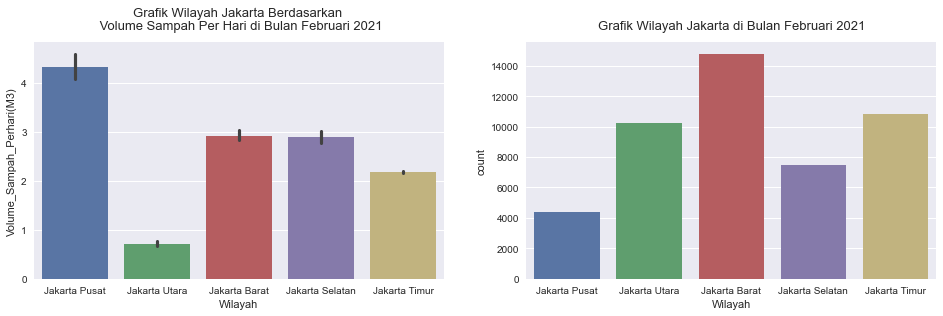

In [62]:
# Melihat perbandingan antar wilayah di Provinsi DKI Jakarta (berdasarkan volume sampah per hari)
plt.figure(figsize=(25, 20))

plt.subplot(4, 3, 1)
sns.barplot(x="Wilayah", y="Volume_Sampah_Perhari(M3)", data=data_februari)
plt.title("Grafik Wilayah Jakarta Berdasarkan \n Volume Sampah Per Hari di Bulan Februari 2021", 
          fontsize=13, pad=13)

plt.subplot(4, 3, 2)
sns.countplot(x="Wilayah", data=data_februari)
plt.title("Grafik Wilayah Jakarta di Bulan Februari 2021", fontsize=13, pad=13)
plt.show()

Berdasarkan grafik diagram diatas maka dapat diambil beberapa kesimpulan diantaranya:

1. Wilayah Jakarta Pusat memiliki volume sampah yang paling tinggi diantara wilayah yang lain sedangkan Wilayah Jakarta Utara memiliki volume sampah yang sangat sedikit. Jika diurutkan dalam hal volume sampah yang berhasil diangkut di setiap wilayah yang ada di Provinsi DKI Jakarta maka akan terjadi susunan seperti dibawah ini:
- Jakarta Pusat.
- Jakarta Barat.
- Jakarta Selatan.
- Jakarta Timur.
- Jakarta Utara.

2. Grafik kedua merupakan grafik yang memperlihatkan perbandingan Wilayah yang ada di Provinsi DKI Jakarta tanpa adanya keterkaitan atau hubungan wilayah dengan kegiatan pengangkutan sampah di setiap harinya. Wilayah Jakarta Barat memiliki nilai yang sangat tinggi yakni mencapai 14.840 sedangkan Wilayah Jakarta Pusat memiliki nilai perhitungan yang sangat kecil yakni hanya mencapai 4.396 saja. Jika diurutkan maka hasilnya adalah sebagai berikut:
- Jakarta Barat.
- Jakarta Timur.
- Jakarta Utara.
- Jakarta Selatan.
- Jakarta Pusat.

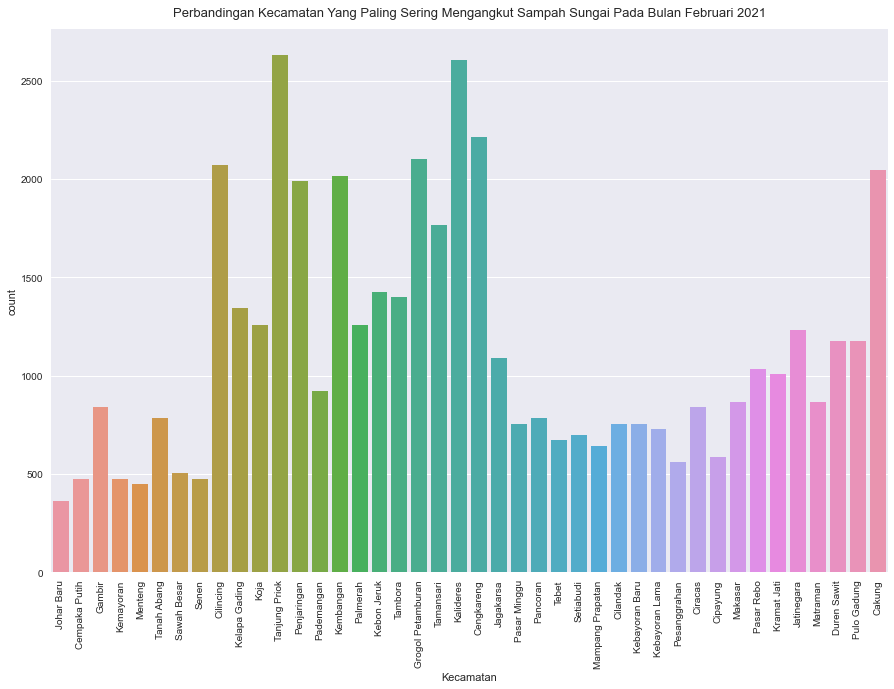

In [65]:
# Melihat perbandingan antar kecamatan dalam hal pengangkutan sampah yang ada di Provinsi DKI Jakarta
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)

sns.countplot(x="Kecamatan", data=data_februari)
plt.title("Perbandingan Kecamatan Yang Paling Sering Mengangkut Sampah Sungai Pada Bulan Februari 2021", fontsize=13, pad=13)
plt.show()

In [67]:
data_februari["Kecamatan"].value_counts()

Tanjung Priok        2632
Kalideres            2604
Cengkareng           2212
Grogol Petamburan    2100
Cilincing            2072
Cakung               2044
Kembangan            2016
Penjaringan          1988
Tamansari            1764
Kebon Jeruk          1428
Tambora              1400
Kelapa Gading        1344
Koja                 1260
Palmerah             1260
Jatinegara           1232
Duren Sawit          1176
Pulo Gadung          1176
Jagakarsa            1092
Pasar Rebo           1036
Kramat Jati          1008
Pademangan            924
Makasar               868
Matraman              868
Gambir                840
Ciracas               840
Tanah Abang           784
Pancoran              784
Cilandak              756
Kebayoran Baru        756
Pasar Minggu          756
Kebayoran Lama        728
Setiabudi             700
Tebet                 672
Mampang Prapatan      644
Cipayung              588
Pesanggrahan          560
Sawah Besar           504
Kemayoran             476
Senen       

Berdasarkan grafik diatas terkait perbandingan jumlah perhitungan total antar Kecamatan yang didasari oleh kolom Titik_Lokasi dalam menghasilkan/mengumpulkan volume sampah per harinya di Provinsi DKI Jakarta bulan Februari 2021, maka dapat diambil kesimpulan sebagai berikut:

1. Kecamatan yang mempunyai nilai tertinggi yakni Kecamatan Tanjung Priok yang memiliki nilai yakni 2.632. Jumlah nilai tersebut tidak ada keterkaitannya dengan volume sampah per harinya melainkan didasarkan atas Titik_Lokasi dari setiap Kecamatan yang berhasil mengangkut sampah-sampah di setiap harinya.
2. Kecamatan yang memiliki nilai tertinggi selanjutnya setelah Kecamatan Tanjung Priok (2.632) adalah kecamatan Kalideres yang memiliki nilai sebanyak 2.604 dan kecamatan tertinggi ketiga adalah kecamatan Cengkareng yang memiliki nilai mencapai 2.212.
3. Sedangkan Kecamatan yang memiliki titik lokasi terendah dalam hal pengangkutan sampah di Provinsi DKI Jakarta adalah Kecamatan Johar Baru yang berada di Wilayah Jakarta Pusat yang memiliki titik lokasi pengangkutan hanya 364 saja. Kalah tipis dari Kecamatan Menteng (448) yang berada di Wilayah yang sama (Jakarta Pusat).

Harus diingat bahwa perhitungan dalam memilih Kecamatan tertinggi sampai terendah didasarkan bukan dari volume sampah yang berhasil dingkut per harinya melainkan dari pengumpulan sampah di suatu titik lokasi tertentu saja seperti melalui kali, saluran penghubung (PHB), waduk, sungai di masing-masing kecamatan, dll.

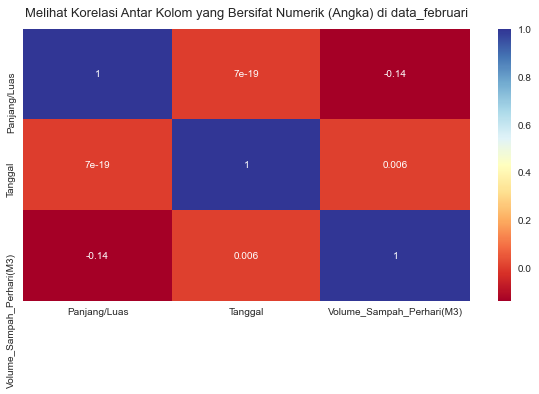

In [70]:
# Melihat korelasi antar kolom yang memiliki bersifat numerik
plt.figure(figsize=(10, 5))

korelasi_data_februari = sns.heatmap(data_februari.corr(), cmap="RdYlBu", annot=True)
korelasi_data_februari.set_title("Melihat Korelasi Antar Kolom yang Bersifat Numerik (Angka) di data_februari", 
                                 fontsize=13, pad=13);

Grafik diatas dinamakan sebagai grafik heatmap atau grafik peta panas dengan menunjukkan nilai korelasi antar masing-masing kolom yang bersifat numerik sedangkan kategorik tidak. Cara membaca grafik ini yaitu membaca dari sumbu y ke sumbu x atau sebaliknya dengan memfokuskan/memperhatikan nilai yang ada di box persegi sebagai penanda nilai korelasinya. Contohnya adalah sebagai berikut:

1. Variabel "Panjang/Luas" yang ada di sumbu y memiliki nilai korelasi 1 dengan variabel yang sama (Panjang/Luas) yang berada di sumbu x. Sedangkan variabel Panjang/Luas yang ada di sumbu y memiliki nilai korelasi -0.14 dengan variabel "Volume_Sampah_Perhari(M3)" yang ada di sumbu x. Hal tersebut menandakan tidak memiliki hubungan timbal-balik.
2. Variabel "Volume_Sampah_Perhari(M3)" yang ada di sumbu y memiliki nilai korelasi = 0.006 dengan variabel Tanggal yang ada di sumbu x. Hal ini menandakan bahwasanya kedua variabel ini (Variabel "Volume_Sampah_Perhari(M3)" yang ada di sumbu y dengan variabel "Tanggal" di sumbu x) sedikit memiliki hubungan timbal balik walaupun penilaian dominannya cenderung tidak memiliki hubungan timbal-balik.

Jadi intinya setiap kolom-kolom yang ada di sumbu y (yang berada di sisi kiri) dibaca/diperhatikan setiap nilainya dengan kolom-kolom yang berada di sumbu x (yang berada di bawah). Untuk memudahkan dalam membedakan apakah nilai korelasinya bagus/tidak dapat dilihat dari indikator warna yang di sebelah paling kanan dari grafik heatmap. Semakin bagus nilai korelasinya maka warnanya menjadi biru tua tetapi semakin buruk/kecil nilai korelasinya maka nilai warna pada box persegi di nilai tersebut menjadi warna merah menyala.

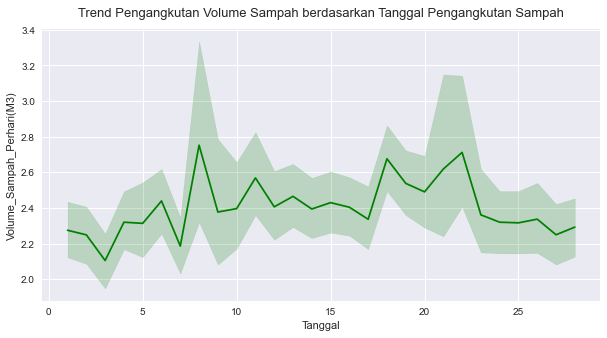

In [71]:
# Melihat trend dalam pengangkutan sampah per harinya berdasarkan tanggal pengangkutan
plt.figure(figsize=(10, 5))
    
sns.lineplot(x="Tanggal", y="Volume_Sampah_Perhari(M3)", color="green", data=data_februari)
plt.title("Trend Pengangkutan Volume Sampah berdasarkan Tanggal Pengangkutan Sampah", fontsize=13, pad=13)
plt.show()

Dari grafik garis (Line plot) diatas menunjukkan intensitas pengangkutan sampah yang dilakukan oleh Dinas Lingkungan Hidup Provinsi DKI Jakarta di setiap hari pada bulan Februari tahun 2021. 

Hasilnya adalah cenderung menunjukkan terjadinya trend kenaikan volume sampah di setiap harinya dan puncaknya terjadi di tanggal 8 Februari dan 17 Februari, dan 22 Februari 2021. Walaupun terdapat juga penurunan intensitas dalam mengumpulkan sampah seperti yang terjadi di tanggal 3 Februari, 6 Februari, 9 Februari, 17 Februari, 21 Februari, dan 23 Februari 2021.

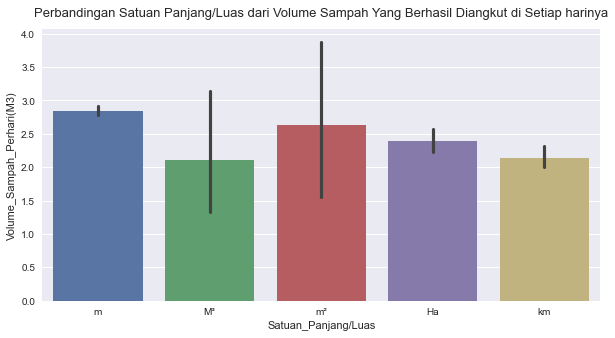

In [72]:
# Membandingkan nilai data di kolom "Satuan_Panjang/Luas" berdasarkan volume sampah yang berhasil diangkut per harinya
plt.figure(figsize=(10, 5))

sns.barplot(x="Satuan_Panjang/Luas", y="Volume_Sampah_Perhari(M3)", data=data_februari)
plt.title("Perbandingan Satuan Panjang/Luas dari Volume Sampah Yang Berhasil Diangkut di Setiap harinya", fontsize=13, pad=13)
plt.show()

Berdasarkan grafik bar pada hasil output diatas dapat diketahui dan diambil kesimpulan seperti:

1. Data yang memiliki nilai dominan dari kolom satuan panjang/luas yang dilihat berdasarkan volume sampah yang berhasil diangkut di setiap harinya adalah data satuan panjang yakni m² yang disusul oleh nilai M³.
2. Sedangkan nilai satuan panjang/luas yang memiliki nilai terkecil adalah nilai km.

Untuk susunan nilai dari yang terbanyak hingga terkecil adalah sebagai berikut:
1. m².
2. M³.
3. m.
4. Ha.
5. km.

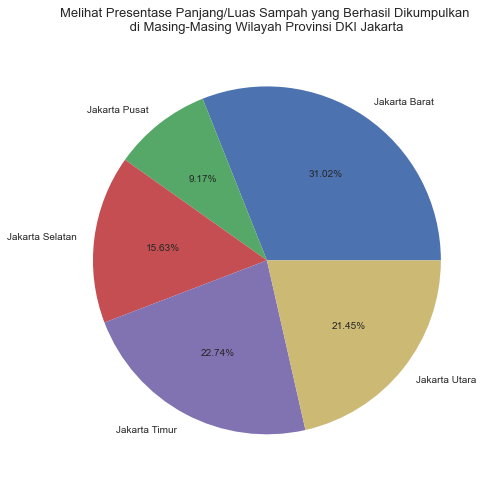

In [73]:
# Melihat komposisi masing-masing wilayah Provinsi DKI Jakarta berdasarkan panjang/luas sampah yang berhasil dikumpulkan
plt.figure(figsize=(10, 8))

data_pie_februari = data_februari.groupby("Wilayah")["Panjang/Luas"].count().reset_index()
plt.pie(data_pie_februari["Panjang/Luas"], labels = data_pie_februari["Wilayah"], autopct = "%.2f%%")
plt.title("Melihat Presentase Panjang/Luas Sampah yang Berhasil Dikumpulkan \n di Masing-Masing Wilayah Provinsi DKI Jakarta ", 
          fontsize=13, pad=13)
plt.show()

Grafik Pie merupakan sebuah grafik yang berfungsi untuk menunjukkan komposisi dari data yang bersifat kategorik dengan memperlihatkan nilai presentase dari masing-masing data dan jumlah total presentase tersebut harus 100% (tidak boleh lebih/kurang).

Berdasarkan grafik pie diatas maka saya dapat menganalisis komposisi data dari kolom Wilayah berdasarkan perhitungan keseluruhan atau nilai SUM dari kolom Panjang/Luas yang dihitung berdasarkan wilayah dari Provinsi DKI Jakarta. Kolom Panjang/Luas ini merupakan sebuah kolom yang menandakan seberapa luasnya area penanganan sampah yang dilakukan oleh Dinas Lingkungan Hidup (DLH) Provinsi DKI Jakarta. Berikut adalah hasil analisa dari saya:

1. Wilayah yang memiliki area penanganan yang paling luas dalam menangani sampah di Provinsi DKI Jakarta adalah wilayah Jakarta Barat yang memiliki nilai presentase sebesar 31.02%.
2. Sedangkan wilayah Jakarta Pusat memiliki area penanganan sampah yang paling kecil dan sempit diantara wilayah-wilayah yang lain (seperti wilayah Jakarta Barat, Jakarta Utara, Jakarta Selatan, dan Jakarta Timur) dengan total nilai presentase sebesar 9.17% dalam sisi luas area penanganan sampah.